## ROC Curve Plotting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = {
    "truth" : [],
    "prediction" : []
}

df = pd.DataFrame(data)

can_df = pd.read_csv("C:\\Users\\NirLavi\\Desktop\\PhD\\Lab\\IL LAB\\O6Meg\\data\\exp2_randomers\\ROC-AUC\\can_validate_full_results.tsv", sep = '\t')
mod_df = pd.read_csv("C:\\Users\\NirLavi\\Desktop\\PhD\\Lab\\IL LAB\\O6Meg\\data\\exp2_randomers\\ROC-AUC\\mod_validate_full_results.tsv", sep = '\t')


#editting can_df
sub_can = can_df[["query_pos", "strand", "mod_probs"]]
sub_can = sub_can[sub_can["strand"] == "+"]

can_mod_probs = sub_can["mod_probs"]
can_mod_probs = can_mod_probs[:].str.split(",", expand = True)
can_mod_probs = can_mod_probs[1]
sub_can.insert(0,"truth",0)
sub_can.insert(1,"prediction",can_mod_probs)


#editting mod_df
sub_mod = mod_df[["query_pos", "strand", "mod_probs"]]
sub_mod = sub_mod[sub_mod["strand"] == "+"]
sub_mod_modified = sub_mod[sub_mod["query_pos"] == 21]
sub_mod_non_modified = sub_mod[sub_mod["query_pos"] != 21]

mod_mod_probs = sub_mod_modified["mod_probs"]
mod_mod_probs = mod_mod_probs[:].str.split(",", expand = True)
mod_mod_probs = mod_mod_probs[1]
sub_mod_modified.insert(0,"truth",1)
sub_mod_modified.insert(1,"prediction",mod_mod_probs)

non_mod_mod_probs = sub_mod_non_modified["mod_probs"]
non_mod_mod_probs = non_mod_mod_probs[:].str.split(",", expand = True)
non_mod_mod_probs = non_mod_mod_probs[1]
sub_mod_non_modified.insert(0,"truth",0)
sub_mod_non_modified.insert(1,"prediction",non_mod_mod_probs)

#concatinating
sub_can = sub_can[["truth", "prediction"]]
sub_mod_non_modified = sub_mod_non_modified[["truth", "prediction"]]
sub_mod_modified = sub_mod_modified[["truth", "prediction"]]

df = pd.concat([sub_can, sub_mod_non_modified, sub_mod_modified])
print(df)
df = df.dropna()

        truth   prediction
0           0  0.001953125
1           0  0.001953125
2           0  0.001953125
3           0  0.001953125
4           0  0.001953125
...       ...          ...
152789      1  0.001953125
153107      1  0.001953125
153429      1  0.001953125
153635      1  0.001953125
153699      1  0.001953125

[266637 rows x 2 columns]


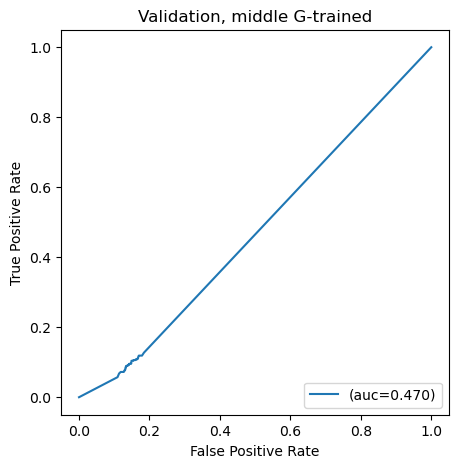

Optimal Threshold:  1.998
True Positive Rate:  0.0
False Positive Rate:  0.0


In [2]:
from sklearn.metrics import roc_curve, auc

truth = np.array(df.iloc[:,0])
prediction = np.array(df.iloc[:,1], dtype=float)

fpr, tpr, thresholds = roc_curve(truth, prediction)
auc = auc(fpr, tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='(auc=%0.3f)' % auc)

plt.title('Validation, middle G-trained')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc = 4)
plt.show()

print("Optimal Threshold: ", round(thresholds[np.argmax(tpr - fpr)],3))
print("True Positive Rate: ", round(tpr[np.argmax(tpr - fpr)],3))
print("False Positive Rate: ", round(fpr[np.argmax(tpr - fpr)],3))